In [2]:
from sympy import *
from sympy.plotting import plot

x = Symbol("x")
f = 2 * x ** 3 + 2 * x ** 2 - 18 * x - 18
f

2*x**3 + 2*x**2 - 18*x - 18

In [3]:
# 1. Определяем корни
#    Нули функции

solveset(f, x)

{-3, -1, 3}

In [5]:
# 2. Находим интервалы, на которых функция возрастает
# 3. Находим интервалы, на которых функция убывает


f_diff = [-oo, oo] 
f_diff[1:1] = solve(diff(f), x)

incr_list = []
decr_list = []

for i in range(1, len(f_diff)):
    val = is_increasing(f, Interval.open(f_diff[i - 1], f_diff[i]))
    if val:
        incr_list.append(f"[{f_diff[i - 1]}, {f_diff[i]}]")
    else:
        decr_list.append(f"[{f_diff[i - 1]}, {f_diff[i]}]")

print(f"Возрастает на интервалах:", *incr_list, sep="\n")
print(f"Убывает на интервалах:", *decr_list, sep="\n")


Возрастает на интервалах:
[-1/3 + 2*sqrt(7)/3, -2*sqrt(7)/3 - 1/3]
Убывает на интервалах:
[-oo, -1/3 + 2*sqrt(7)/3]
[-2*sqrt(7)/3 - 1/3, oo]


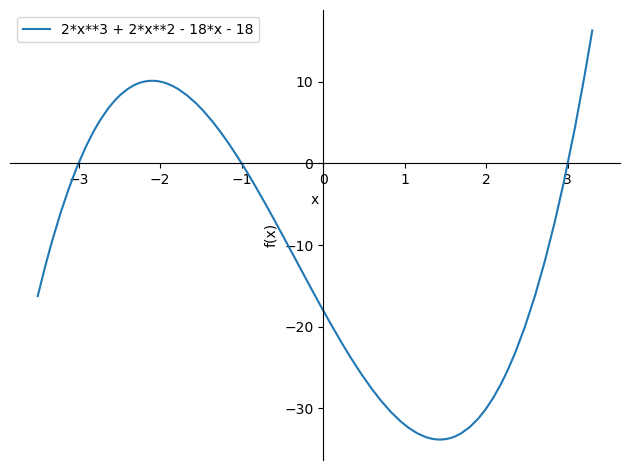

In [13]:
# 4. Построить график

plot(f,(x,-3.5,3.3), legend=True)

In [14]:
# 5. Вычисляем вершину
#    Экстремумы функции
from random import uniform

f_diff = sorted(solveset(diff(f), x, Reals).evalf(2))
f_diff.insert(0, f_diff[0] - 1)
f_1 = diff(f)

ext_list = []

for i, val in enumerate(f_diff):
    ext_list.append(f_1.subs(x, uniform(val, f_diff[i] + 1)))
    if i != 0:
        if ext_list[i - 1] < 0 < ext_list[i]:
            print(f"Точка минимума: {val}, {f.subs(x, val).evalf(2)}")
        elif ext_list[i - 1] > 0 > ext_list[i]:
            print(f"Точка максимума: {val}, {f.subs(x, val).evalf(2)}")

Точка максимума: -2.1, 10
Точка минимума: 1.4, -34


In [25]:
# 6. Определяем промежутки, на котором f > 0
# 7. Определяем промежутки, на котором f < 0

roots_fun = [-oo, oo]
roots_fun[1:1] = solve(f, x)

incr_list = []
decr_list = []

for i in range (1,len(roots_fun)):
    num_1, num_2 = roots_fun[i - 1], roots_fun[i]
    val = is_increasing(f, Interval.open(num_1, num_2))
    if val:
        incr_list.append(f"[{num_1}, {num_2}]")
    else:
        decr_list.append(f"[{num_1}, {num_2}]")

print("f > 0:", *incr_list, sep="\n")
print("f < 0:", *decr_list, sep="\n")

f > 0:
[-oo, -3]
[3, oo]
f < 0:
[-3, -1]
[-1, 3]
